origin: http://pytorch.org/tutorials/beginner/pytorch_with_examples.html  
translator: Hongpu Liu

In [1]:
%matplotlib inline
from __future__ import print_function

# 用PyTorch中的Tensor实现
Numpy是一个很棒的框架，但是无法利用GPU来加速数值计算。对于现代的深度神经网络，GPUs通常可以提速50倍以上，因此numpy无法满足现代深度神经网络的需求。

接下来介绍**Tensor**这一更为基础的PyTorch概念。PyTorch中**Tensor**的概念等同于numpy数组，**Tensor**就是一个多维数组。PyTorch提供了大量的函数来操作**Tensor**。与numpy数组类似，**Tensor**并不包含任何深度学习、计算图和梯度计算功能，它们只是通用科学计算工具而已。

然而与numpy不同，PyTorch中的**Tensor**可以利用GPUs来加速数值计算。要将**Tensor**在GPU上运行，只需要简单的将其进行类型变换。

接下来用**Tensor**实现这个两层神经网络，与numpy的例子类似，需要手动实现前馈与反馈传播：

In [2]:
import torch

dtype = torch.FloatTensor
# 若需要运行在GPU上则取消下一行的注释
# dtype = torch.cuda.FloatTensor

# N     ：样本的数量，本例采用批量梯度下降，每次训练使用全部的样本
# D_in  ：输入特征的维度
# H     ：隐层神经元的数量
# D_out ：输出层维度
N, D_in, H, D_out = 64, 1000, 100, 10

# 随机生成数据集，包含N个输入和N个输出
x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

# 对神经网络的权重进行随机初始化
w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

# 设置学习率
learning_rate = 1e-6

# 保存训练过程中的loss
losses = []

for t in range(500):
    # 前馈：计算预测值y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    
    # 计算和输出loss
    loss = (y_pred - y).pow(2).sum()
    print(t, loss)
    losses.append(loss)
    
    # 反向传播：计算loss对w1和w2的梯度
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    # 更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 35042951.2567
1 36443095.1117
2 40467844.132
3 38780580.1599
4 29040386.761
5 16213366.7331
6 7652083.78188
7 3603387.78621
8 1998899.63186
9 1332569.05106
10 1008458.98229
11 814948.892455
12 680053.713899
13 577167.559023
14 494882.459524
15 427449.694723
16 371425.937468
17 324453.166458
18 284732.940129
19 250986.367791
20 222158.596714
21 197357.921922
22 175939.341068
23 157354.519767
24 141159.846827
25 126988.880945
26 114520.649848
27 103529.859511
28 93799.8158891
29 85163.9373655
30 77474.1986186
31 70613.2683534
32 64478.5954698
33 58982.7115277
34 54041.1534533
35 49586.3408188
36 45563.0384192
37 41923.1069062
38 38624.0868758
39 35627.2656987
40 32899.1544103
41 30413.2956909
42 28143.7298929
43 26064.5968338
44 24162.7046787
45 22419.7852456
46 20821.075919
47 19352.4724477
48 18001.8619611
49 16758.816737
50 15613.0748528
51 14556.2294671
52 13580.1525999
53 12678.2806879
54 11843.6429905
55 11071.8479472
56 10356.7960658
57 9693.48714508
58 9077.76364428
59 8505.940

497 0.000111912400957
498 0.000110463523554
499 0.000108779482148


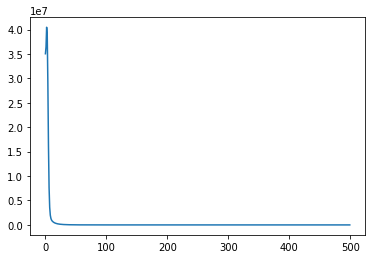

In [3]:
import matplotlib.pyplot as plt
plt.plot(losses)